In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("marketing_data.xlsx")

In [207]:
df.shape

(2240, 22)

## Data Profiling

In [208]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [209]:
df['Income'] = df['Income'].fillna(0) # Assume that there are people with no income

In [210]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical) # These 
# columns are subject for encoding except for Dt_customer 
# which will be validated later

There are 3 categorical variables

The categorical variables are : ['Education', 'Marital_Status', 'Dt_Customer']


In [211]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical) 

There are 19 numerical variables

The numerical variables are : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


## Data Cleaning and Transformation

In [212]:
from datetime import datetime

quantified_year = df

quantified_year["Year_Birth"] = pd.to_datetime(quantified_year["Year_Birth"], 
                                               format = "%Y") 

year = datetime.now().year # the assumed threshold is 2024

quantified_year["Age"] = year - quantified_year['Year_Birth'].dt.year

quantified_year

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961-01-01,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,48,78,2,5,2,11,4,0,0,48
2236,5263,1977-01-01,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,16,1,1,0,3,8,0,0,47
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,5,14,2,6,1,5,8,0,0,48
2238,528,1978-01-01,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,165,63,1,5,4,10,3,0,0,46


In [213]:
def check_year_birth_before_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], 
                                       infer_datetime_format=True, 
                                       errors='coerce')
    df = df.dropna(subset=['Dt_Customer'])
    df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
    df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
    
    df['Age_At_Registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']
    filtered_df = df[(df['Year_Birth'] <= df['Dt_Customer'].dt.year) & 
                     (df['Age_At_Registration'] >= 18)]
    return filtered_df


validated_dt_customer = check_year_birth_before_dt_customer(quantified_year)
validated_dt_customer = validated_dt_customer.dropna()
validated_dt_customer = validated_dt_customer.drop(columns=['Year_Birth', 
                                            'Age_At_Registration'], axis=1)
validated_dt_customer

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1367998003.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1367998003.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1367998003.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,54
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,63
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,66
3,1386,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,57
4,5371,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,...,48,78,2,5,2,11,4,0,0,48
2236,5263,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,8,16,1,1,0,3,8,0,0,47
2237,22,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,...,5,14,2,6,1,5,8,0,0,48
2238,528,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,...,165,63,1,5,4,10,3,0,0,46


In [214]:
def quantify_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Customer_Enrollment'] = df['Dt_Customer'].max() - df['Dt_Customer']
    df['Customer_Enrollment'] = df['Customer_Enrollment'].astype(str)
    .str.replace(' days', '')
    df['Customer_Enrollment'] = pd.to_numeric(df['Customer_Enrollment'], 
                                              downcast='integer')
    return df

quantify_dt_customer(validated_dt_customer)
validated_dt_customer = validated_dt_customer.drop(columns='Dt_Customer', 
                                                   axis=1)
validated_dt_customer

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,173
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,174
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,207
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,57,31
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,35,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,48,521
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,47,683
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,48,999
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,46,737


In [215]:
validated_dt_customer['Marital_Status'].unique() # Many unusual labels might mess up the model.

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [216]:
def standardize_status(df):
    df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 
                    'Absurd'], 'Single')
    allowed_values = ['Single', 'Married', 'Widow', 'Divorced', 'Together'] 
    df = df[df['Marital_Status'].isin(allowed_values)]
    return df
standardized_status = standardize_status(validated_dt_customer)
standardized_status

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,173
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,174
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,207
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,57,31
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,35,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,48,521
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,47,683
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,48,999
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,46,737


## Data Profiling but more focused on Customer Demographic

count      2237.000000
mean      51680.167635
std       25593.457517
min           0.000000
25%       34728.000000
50%       51039.000000
75%       68274.000000
max      666666.000000
Name: Income, dtype: float64

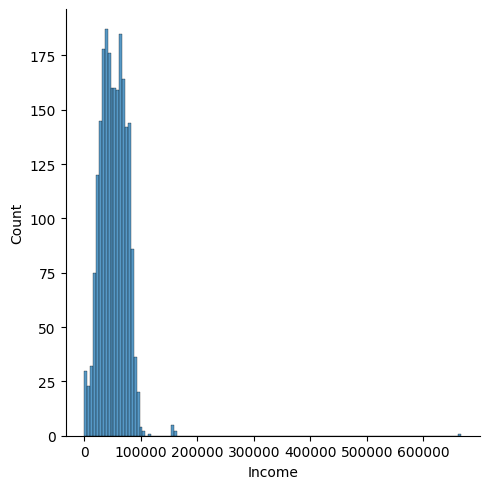

In [217]:
sns.displot(standardized_status['Income']) # possible outliers
standardized_status['Income'].describe()

In [218]:
# Dropping Outliers in Income using STD method
income = standardized_status['Income'].values
mean = np.mean(income)
std = np.std(income)

threshold_lower = mean - 2 * std
threshold_upper = mean + 2 * std

normalized_income = standardized_status[(standardized_status['Income'] 
            >= threshold_lower) & (standardized_status['Income'] 
            <= threshold_upper)]

count      2203.000000
mean      51573.533364
std       20621.026967
min        1730.000000
25%       35196.000000
50%       51267.000000
75%       68145.000000
max      102692.000000
Name: Income, dtype: float64

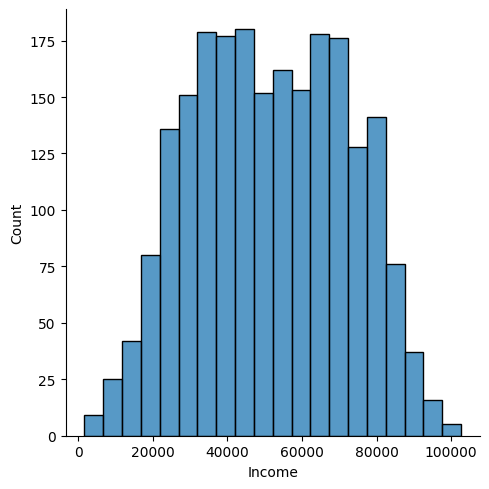

In [219]:
sns.displot(normalized_income['Income']) # reasonable prices
normalized_income['Income'].describe()

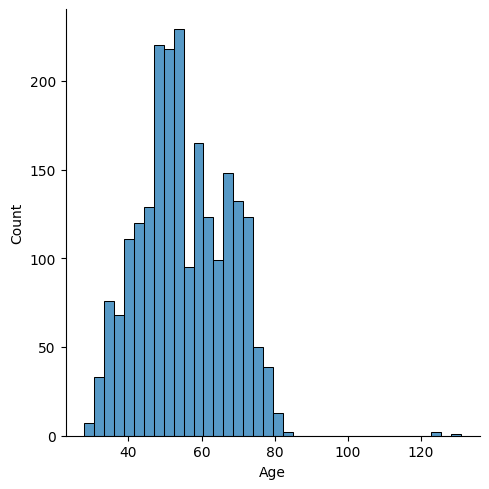

In [220]:
sns.displot(normalized_income['Age']) # There is someone over 100 y/o. 

In [221]:
## Same gist as before. Since we already filtered out underage customers, we now filter out the 95% of customers in terms of age.

def normalize_age (df):
    percentile = df['Age'].quantile(0.95)
    print("The 95% threshold is: ", percentile)
    filtered_data = df[(df['Age'] != 0) & (df['Age'] <= percentile)]
    return filtered_data

normalized_age = normalize_age(normalized_income)
normalized_age

The 95% threshold is:  74.0


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,173
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,174
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,207
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,57,31
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,35,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,48,521
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,47,683
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,48,999
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,46,737


count    2096.000000
mean       54.031489
std        10.841534
min        28.000000
25%        46.000000
50%        53.000000
75%        63.000000
max        74.000000
Name: Age, dtype: float64

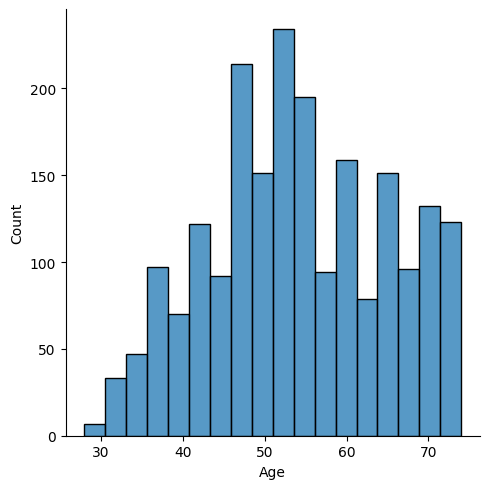

In [222]:
sns.displot(normalized_age['Age']) 
normalized_age['Age'].describe() 

In [223]:
normalized_age

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,173
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,174
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,207
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,57,31
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,35,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,48,521
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,47,683
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,48,999
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,46,737


In [224]:
# Enhanced Duplication Deletion
# This method deletes customers with the same exact income, spending patterns, age, and views on catalogs
# While there is still a chance of 2 customers having the same exact life, the chance is still near zero, so assume that it is a
# duplicate entry.
def delete_almost_exact(df):
    df_filtered = df.drop_duplicates(subset=df.columns.difference(['ID']), 
                                     keep='last')
    return df_filtered
removed_dups = delete_almost_exact(normalized_age)
removed_dups

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,173
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,174
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,207
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,0,1,1,0,2,7,0,0,57,31
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,34,2,3,1,2,7,1,0,35,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,78,2,5,2,11,4,0,0,48,521
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,16,1,1,0,3,8,0,0,47,683
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,14,2,6,1,5,8,0,0,48,999
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,63,1,5,4,10,3,0,0,46,737


## Exploratory Data Analysis

In [225]:
removed_dups.dtypes

ID                       int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int32
Customer_Enrollment      int16
dtype: object

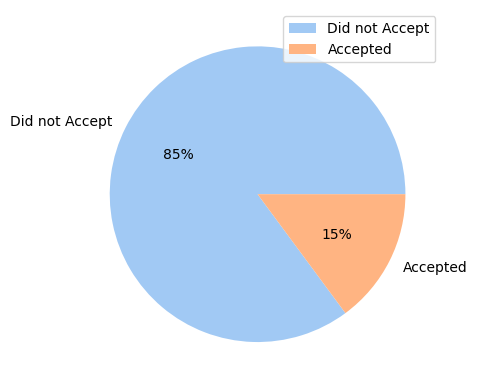

In [226]:
colors = sns.color_palette('pastel')[0:len(removed_dups['Response']
                                           .value_counts())]
#create pie chart
plt.pie(removed_dups['Response'].value_counts(), labels=['Did not Accept', 
                    'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show() 

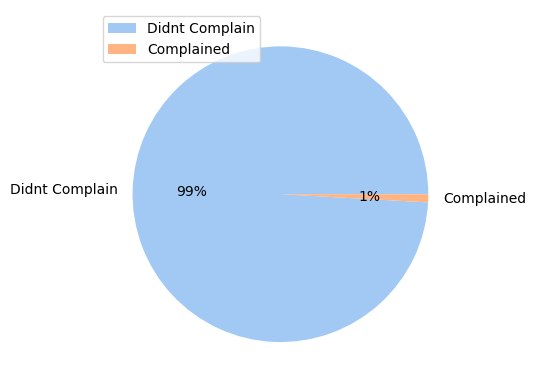

In [227]:
colors = sns.color_palette('pastel')[0:len(removed_dups['Complain'].value_counts())]
#create pie chart
plt.pie(removed_dups['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show() ## 99:1 means that the supermarket itself has excellent service

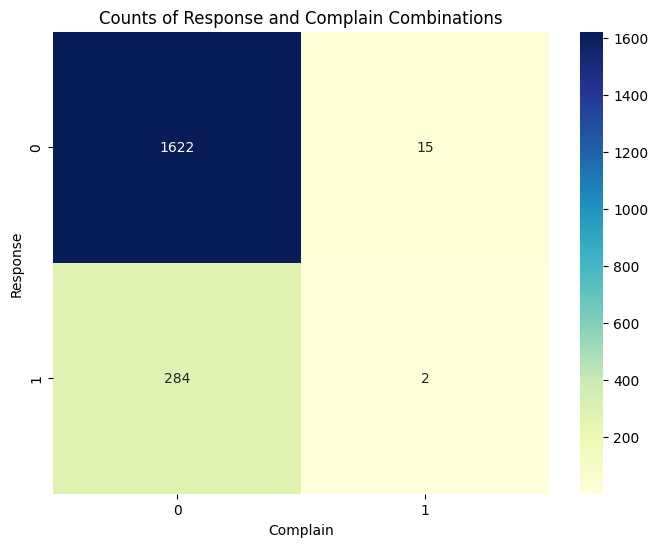

In [228]:
cross_tab = pd.crosstab(removed_dups['Response'], removed_dups['Complain'])
# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Counts of Response and Complain Combinations")
plt.xlabel("Complain")
plt.ylabel("Response")
plt.show() 

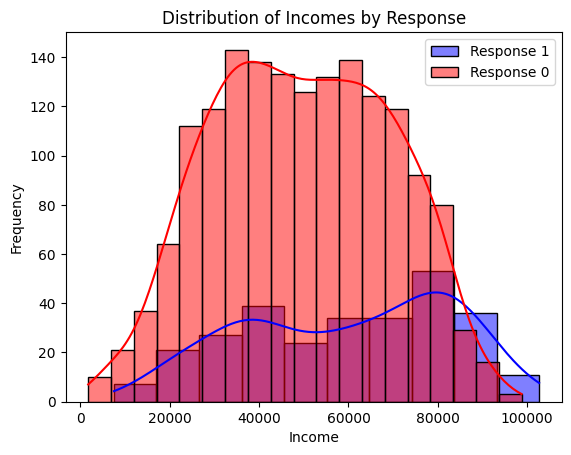

In [229]:
sns.histplot(removed_dups[removed_dups['Response'] == 1]['Income'], color='blue', kde=True, label='Response 1')
sns.histplot(removed_dups[removed_dups['Response'] == 0]['Income'], color='red', kde=True, label='Response 0')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Incomes by Response')
plt.legend()
plt.show() # normal distribution so far considering our ratio

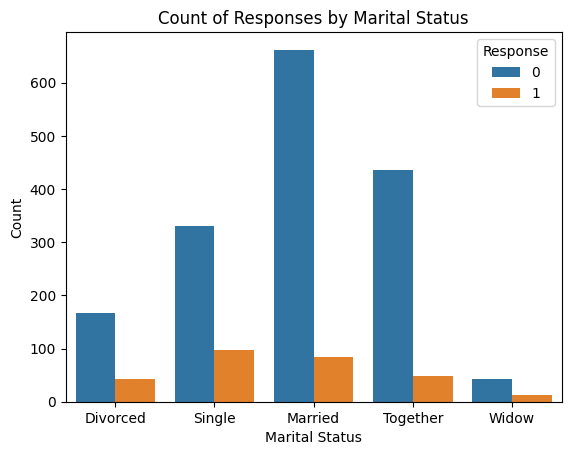

In [230]:
sns.countplot(data=removed_dups, x='Marital_Status', hue='Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Responses by Marital Status')
plt.show() # it seems that Single has the highest odds of availing the promo. 

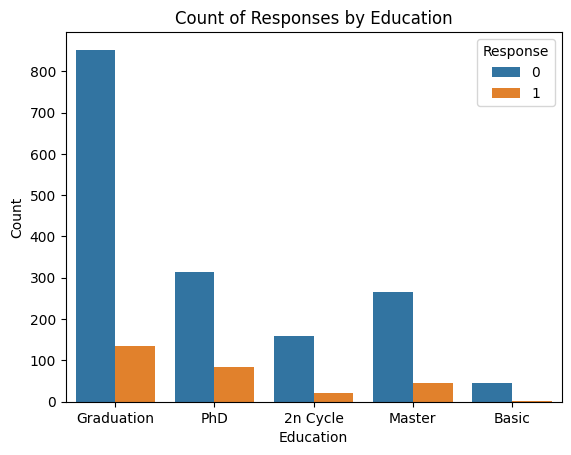

In [231]:
sns.countplot(data=removed_dups, x='Education', hue='Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Responses by Education')
plt.show() # Basic has little chances to avail the promo as is with 2n Cycle Education

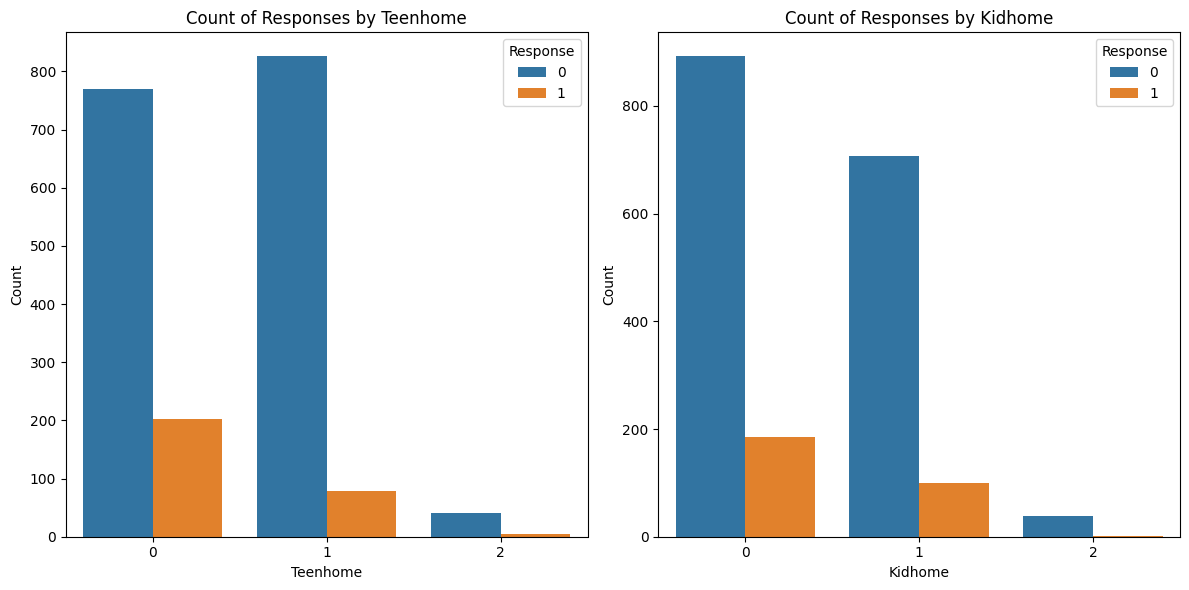

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=removed_dups, x='Teenhome', hue='Response', ax=axes[0])
axes[0].set_title('Count of Responses by Teenhome')
axes[0].set_xlabel('Teenhome')
axes[0].set_ylabel('Count')
sns.countplot(data=removed_dups, x='Kidhome', hue='Response', ax=axes[1])
axes[1].set_title('Count of Responses by Kidhome')
axes[1].set_xlabel('Kidhome')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show() # so it seems that If there are 2 teens or 2 kids at home, the customer would not likely avail.


C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\2502158342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Household'] = removed_dups['Teenhome'] + removed_dups['Kidhome']


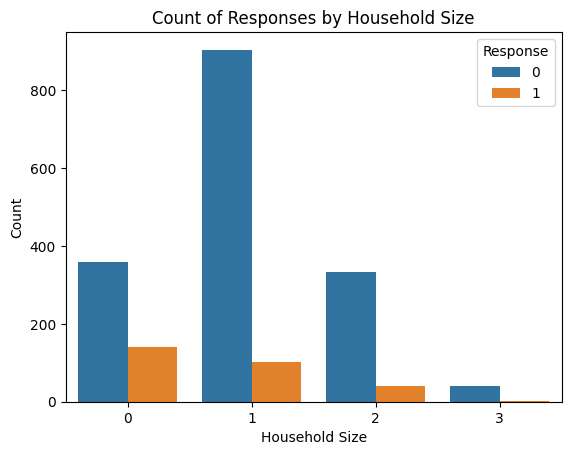

In [233]:
# Let us try combining them to make a household size column
removed_dups['Household'] = removed_dups['Teenhome'] + removed_dups['Kidhome']
sns.countplot(data=removed_dups, x='Household', hue='Response')
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Count of Responses by Household Size')
plt.show() 

In [234]:
removed_dups['Children'] = removed_dups['Kidhome'] + removed_dups['Teenhome']
def classify_family(row):
    if row['Children'] == 0:
        return 'Childless'
    elif row['Children'] == 1:
        return 'Single-Child'
    elif 2 <= row['Children'] <= 3:
        return 'Medium-Children'
    else:
        return 'Large-Family'

removed_dups['Family_Classification'] = removed_dups.apply(classify_family, 
                                                           axis=1)
single_parents = ['Single', 'Widow', 'Divorced']
removed_dups['Single_Parent'] = removed_dups.apply(lambda row: 
            row['Marital_Status'] in single_parents and 
            row['Children'] > 0, axis=1)

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1417451869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Children'] = removed_dups['Kidhome'] + removed_dups['Teenhome']
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1417451869.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Family_Classification'] = removed_dups.apply(classify_family, axis=1)
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1417451869.py:14: SettingWithCopyWarning: 


In [235]:
removed_dups.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment,Household,Children,Family_Classification,Single_Parent
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,6,1,1,0,54,173,0,0,Childless,False
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,7,5,1,0,63,174,0,0,Childless,False
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,5,2,0,0,66,207,1,1,Single-Child,False
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,2,7,0,0,57,31,2,2,Medium-Children,False
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,2,7,1,0,35,124,1,1,Single-Child,True


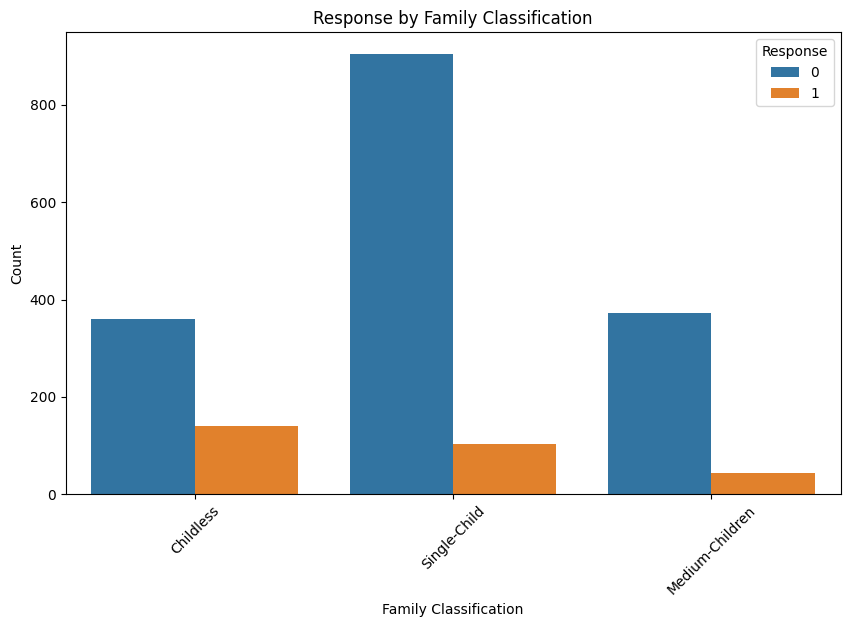

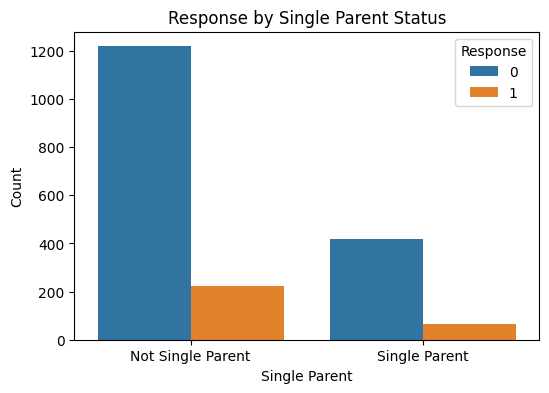

In [236]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Classification', hue='Response', data=removed_dups)
plt.title('Response by Family Classification')
plt.xlabel('Family Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Single_Parent', hue='Response', data=removed_dups)
plt.title('Response by Single Parent Status')
plt.xlabel('Single Parent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Single Parent', 'Single Parent'])
plt.legend(title='Response', loc='upper right')
plt.show()

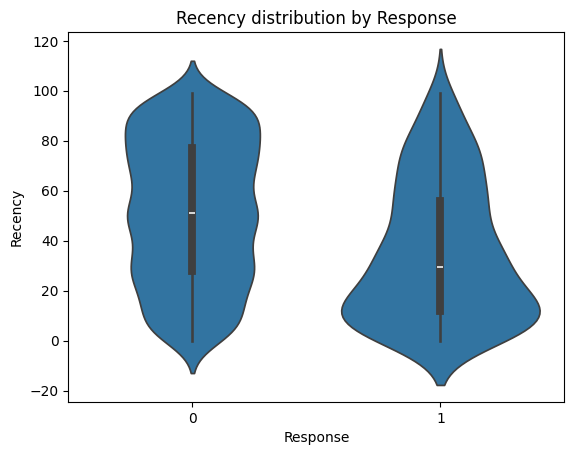

In [237]:
sns.violinplot(data=removed_dups, x='Response', y='Recency')
plt.title('Recency distribution by Response')
plt.xlabel('Response')
plt.ylabel('Recency')
plt.show() 

In [238]:
removed_dups['Recency'].describe()

count    1923.000000
mean       49.077483
std        28.997376
min         0.000000
25%        24.500000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [239]:
bins = [0, 25, 49, 74, 99, float('inf')]  
labels = ['Very Recent', 'Recent', 'Moderate', 'Less Frequent', 'Infrequent']
removed_dups['Recency_Class'] = pd.cut(removed_dups['Recency'], bins=bins, 
                                    labels=labels, right=False)

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\379669229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Recency_Class'] = pd.cut(removed_dups['Recency'], bins=bins, labels=labels, right=False)


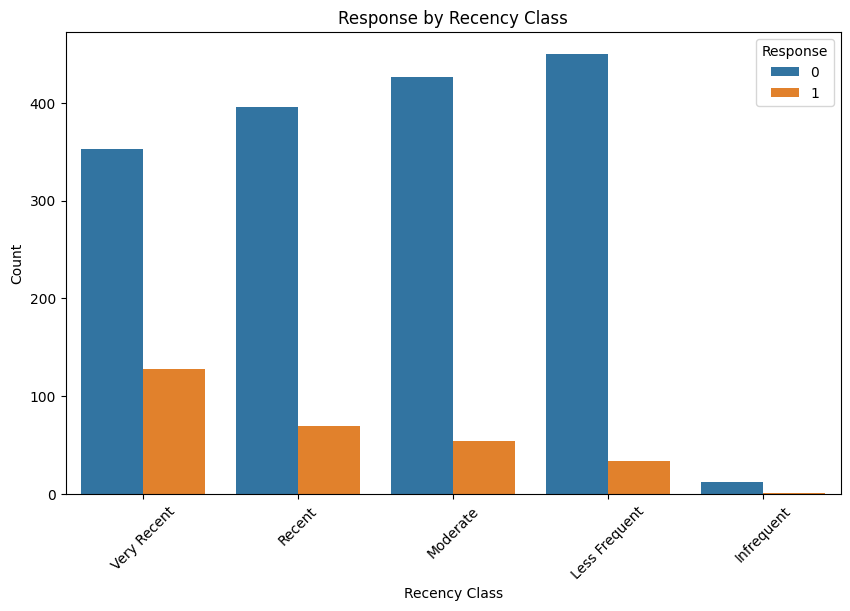

In [240]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Recency_Class', hue='Response', data=removed_dups, order=labels)
plt.title('Response by Recency Class')
plt.xlabel('Recency Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()


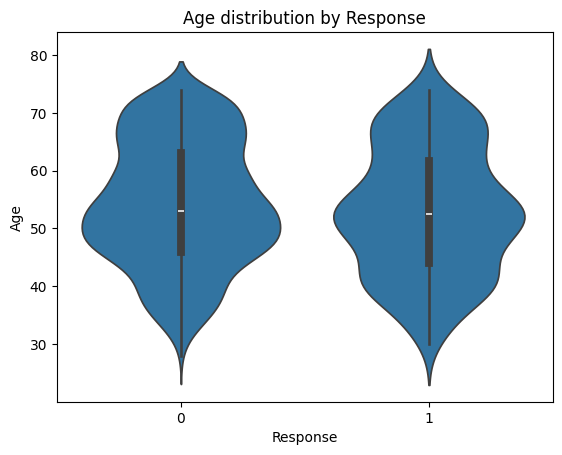

In [241]:
sns.violinplot(data=removed_dups, x='Response', y='Age')
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Age distribution by Response')
plt.show()

In [242]:
removed_dups['Age'].describe()

count    1923.000000
mean       54.085283
std        10.821607
min        28.000000
25%        46.000000
50%        53.000000
75%        63.000000
max        74.000000
Name: Age, dtype: float64

In [243]:
bins = [28, 46, 53, 63, 74, float('inf')]  
labels = ['Middle-Aged Working Class', 'Quinquagenarian', 
          'Retiree', 'Senior Citizen', 'Very Old Senior Citizen']
removed_dups['Age_Class'] = pd.cut(removed_dups['Age'], bins=bins, 
                                   labels=labels, right=False)

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\4289661725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Age_Class'] = pd.cut(removed_dups['Age'], bins=bins, labels=labels, right=False)


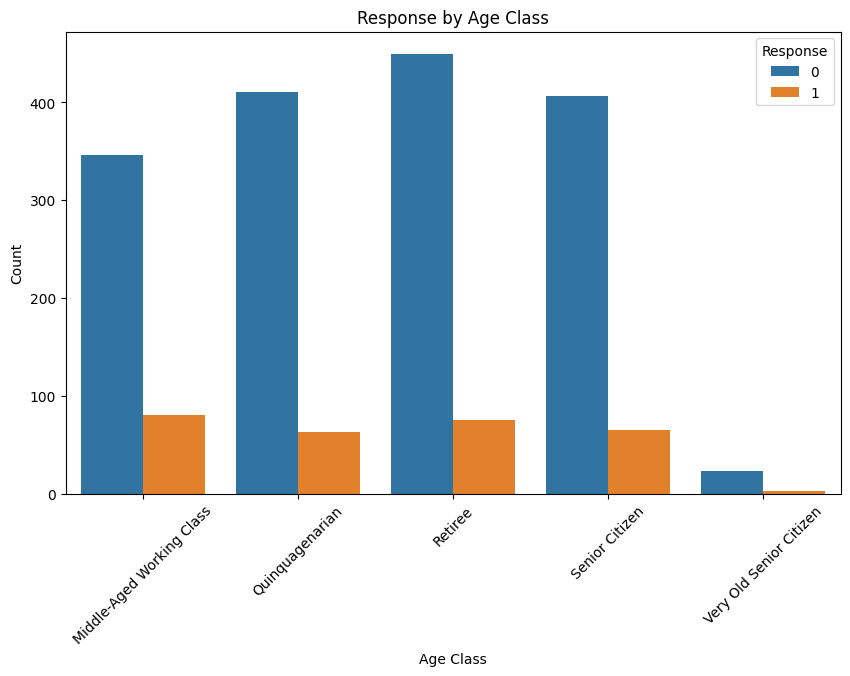

In [244]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Class', hue='Response', data=removed_dups, order=labels)
plt.title('Response by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()


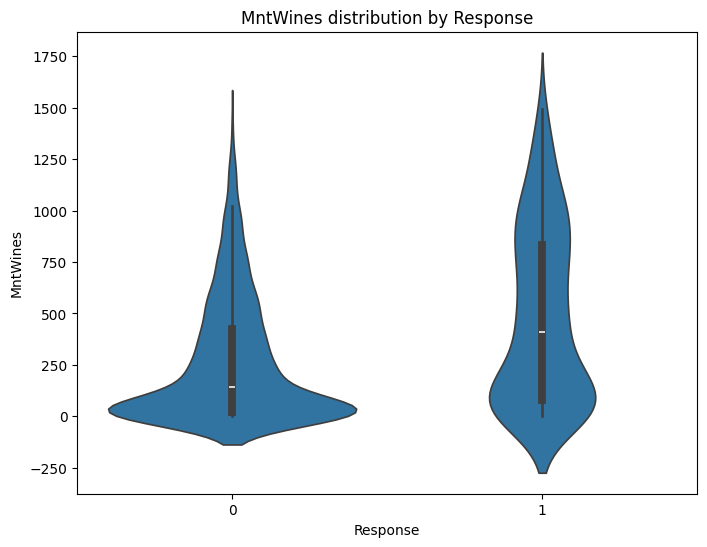

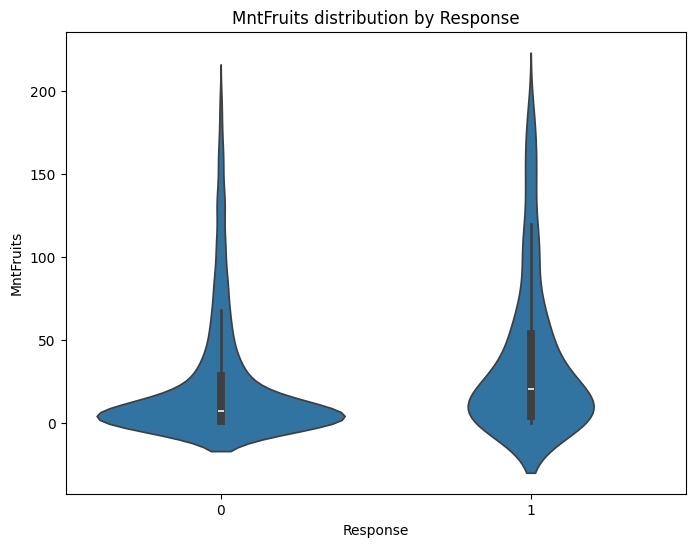

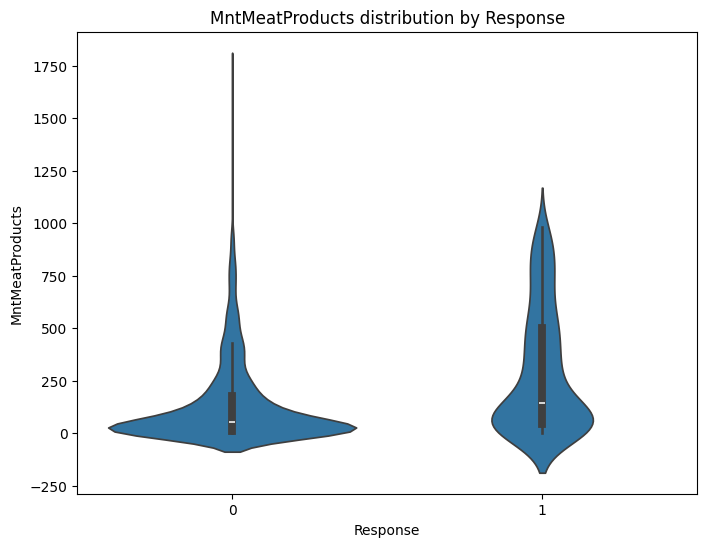

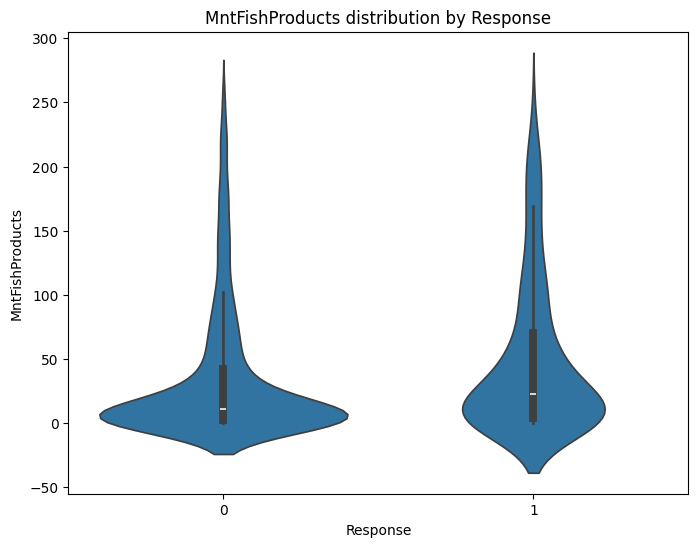

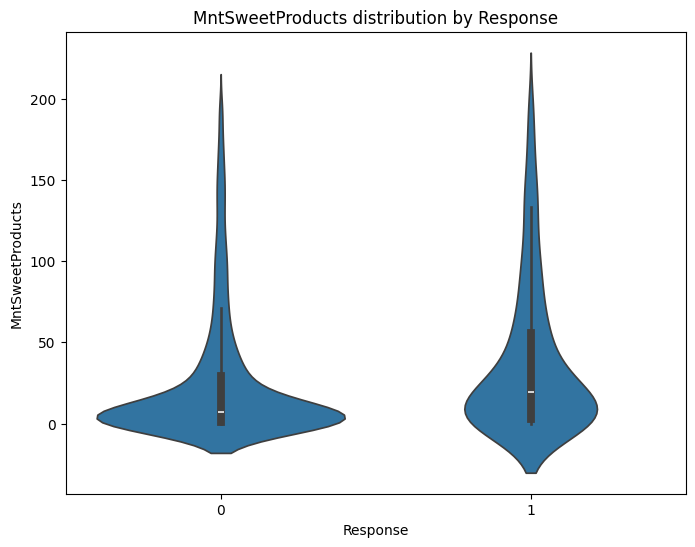

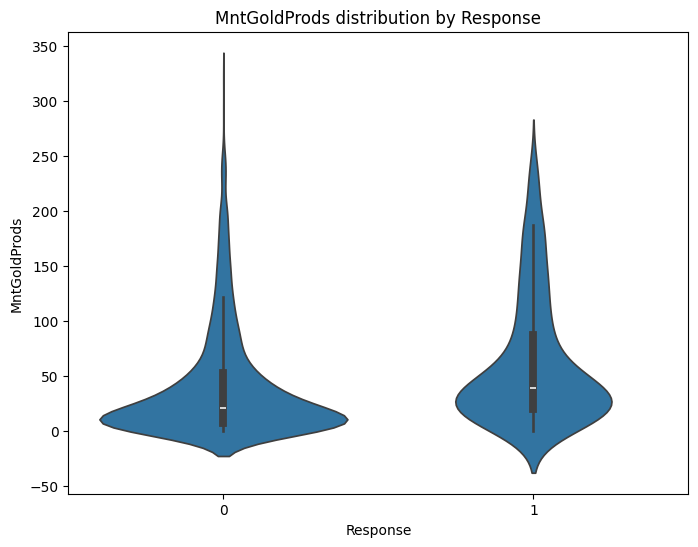

In [245]:
amount_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in amount_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=removed_dups, x='Response', y=column)
    plt.title(f'{column} distribution by Response')
    plt.xlabel('Response')
    plt.ylabel(column)
    plt.show()


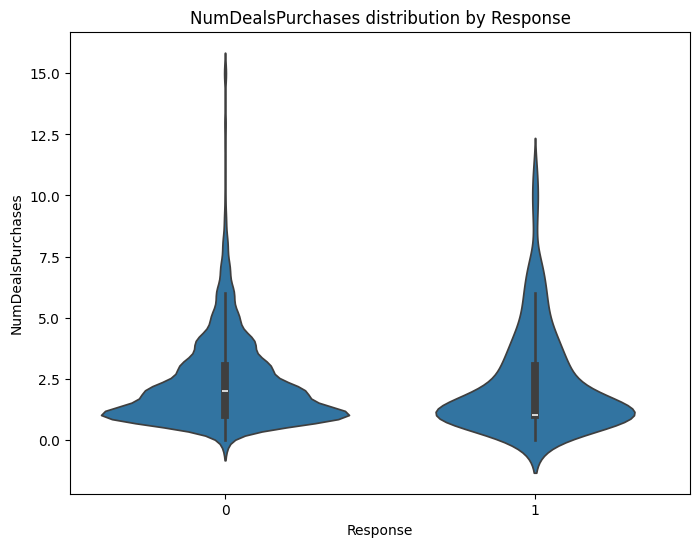

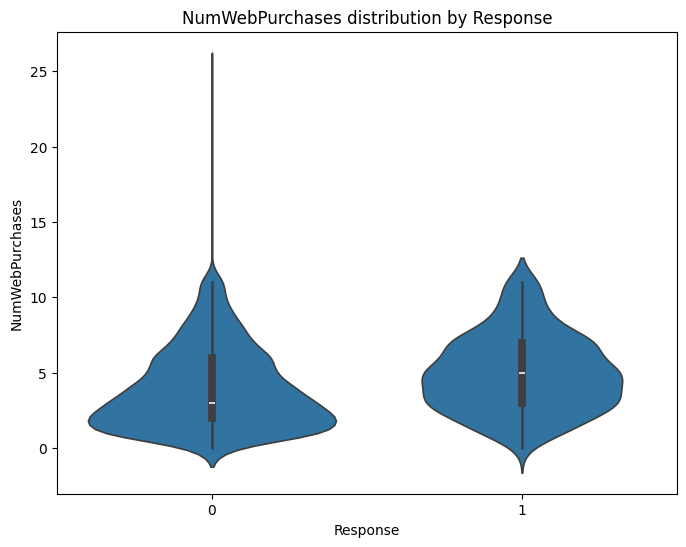

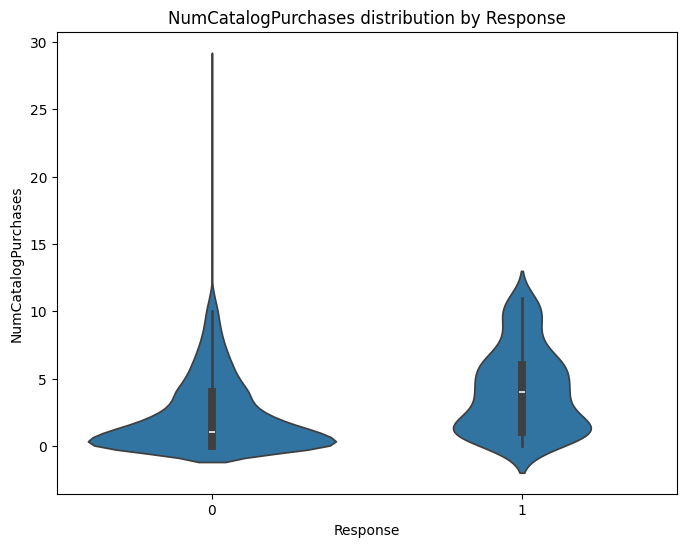

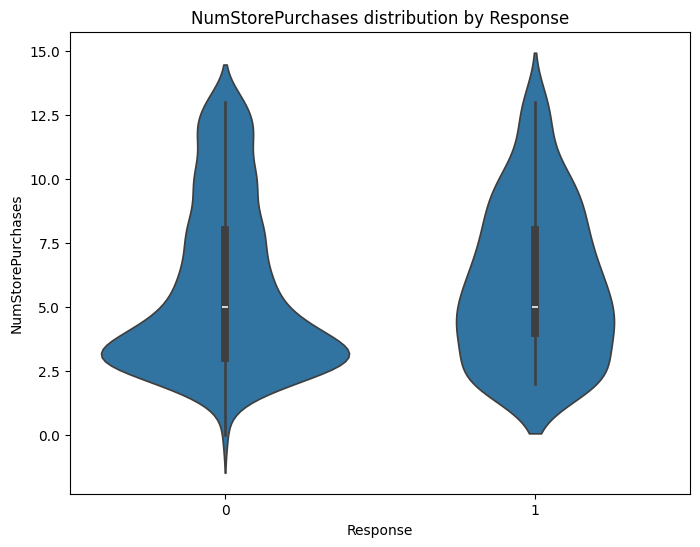

In [246]:
purchases_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for column in purchases_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=removed_dups, x='Response', y=column)
    plt.title(f'{column} distribution by Response')
    plt.xlabel('Response')
    plt.ylabel(column)
    plt.show()

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\3457674065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Spent'] = removed_dups[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


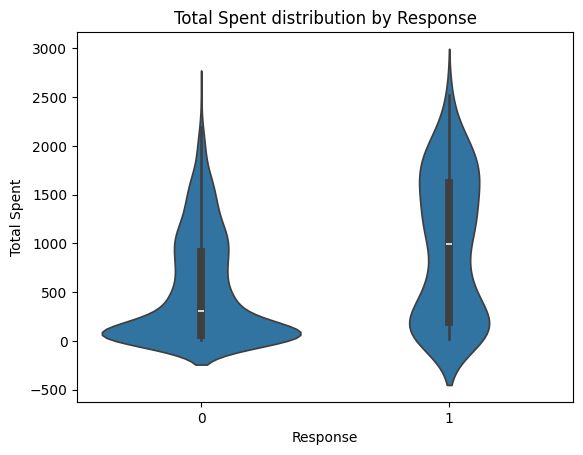

In [247]:
removed_dups['Total_Spent'] = removed_dups[['MntWines', 'MntFruits', 
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                'MntGoldProds']].sum(axis=1)
sns.violinplot(data=removed_dups, x='Response', y='Total_Spent')
plt.xlabel('Response')
plt.ylabel('Total Spent')
plt.title('Total Spent distribution by Response')
plt.show() 

In [248]:
removed_dups['Total_Spent'].describe()

count    1923.000000
mean      589.721269
std       594.744090
min         5.000000
25%        67.000000
50%       369.000000
75%      1020.500000
max      2525.000000
Name: Total_Spent, dtype: float64

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1967864217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Spent_Class'] = pd.cut(removed_dups['Total_Spent'], bins=bins, labels=labels, right=False)


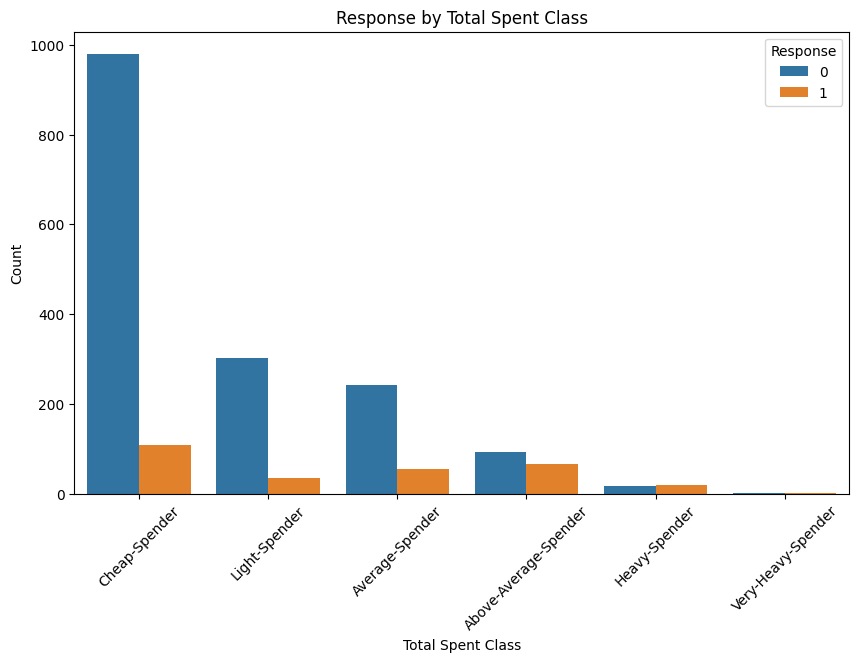

In [249]:
bins = list(range(0, 3500, 500))
labels = ['Cheap-Spender', 'Light-Spender', 'Average-Spender', 
          'Above-Average-Spender', 'Heavy-Spender', 'Very-Heavy-Spender']
removed_dups['Total_Spent_Class'] = pd.cut(removed_dups['Total_Spent'], 
                        bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Spent_Class', hue='Response', data=removed_dups, 
              order=labels)
plt.title('Response by Total Spent Class')
plt.xlabel('Total Spent Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()


C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\2470478981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Purchases'] = removed_dups[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)


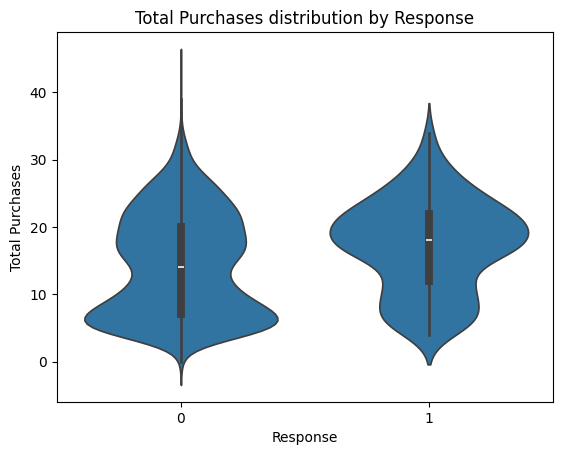

In [250]:
removed_dups['Total_Purchases'] = removed_dups[['NumDealsPurchases', 
                        'NumWebPurchases', 'NumCatalogPurchases', 
                        'NumStorePurchases']].sum(axis=1)
sns.violinplot(data=removed_dups, x='Response', y='Total_Purchases')
plt.xlabel('Response')
plt.ylabel('Total Purchases')
plt.title('Total Purchases distribution by Response')
plt.show() 

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\2153755722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Purchases_Class'] = pd.cut(removed_dups['Total_Purchases'], bins=bins, labels=labels, right=False)


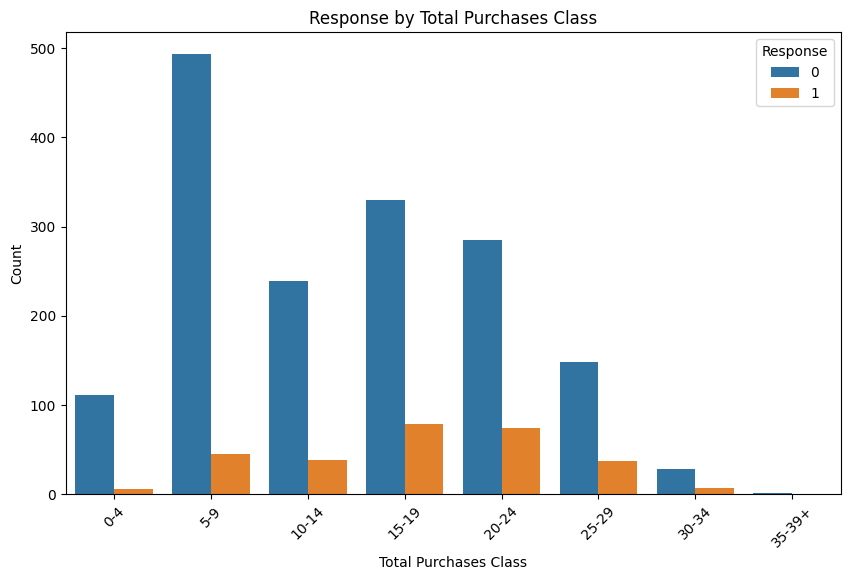

In [251]:
bins = list(range(0, 45, 5)) 
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39+']
removed_dups['Total_Purchases_Class'] = pd.cut(removed_dups['Total_Purchases'], 
                    bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Purchases_Class', hue='Response', data=removed_dups, 
                    order=labels)
plt.title('Response by Total Purchases Class')
plt.xlabel('Total Purchases Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1022897294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Visits'] = removed_dups[['Recency', 'NumWebVisitsMonth']].sum(axis=1)


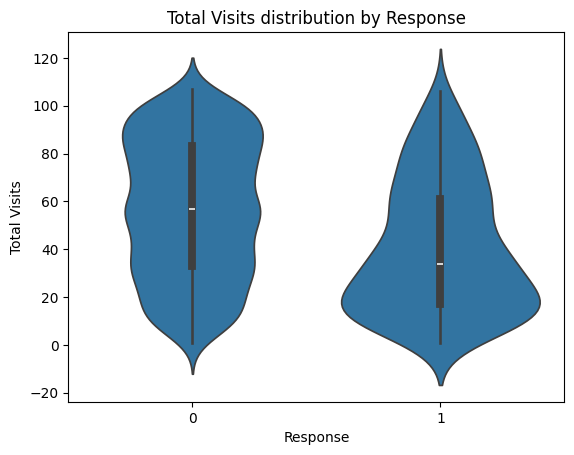

In [252]:
removed_dups['Total_Visits'] = removed_dups[['Recency', 
                                'NumWebVisitsMonth']].sum(axis=1)
sns.violinplot(data=removed_dups, x='Response', y='Total_Visits')
plt.xlabel('Response')
plt.ylabel('Total Visits')
plt.title('Total Visits distribution by Response')
plt.show() 

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\619716798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_dups['Total_Visits_Class'] = pd.cut(removed_dups['Total_Visits'], bins=bins, labels=labels, right=False)


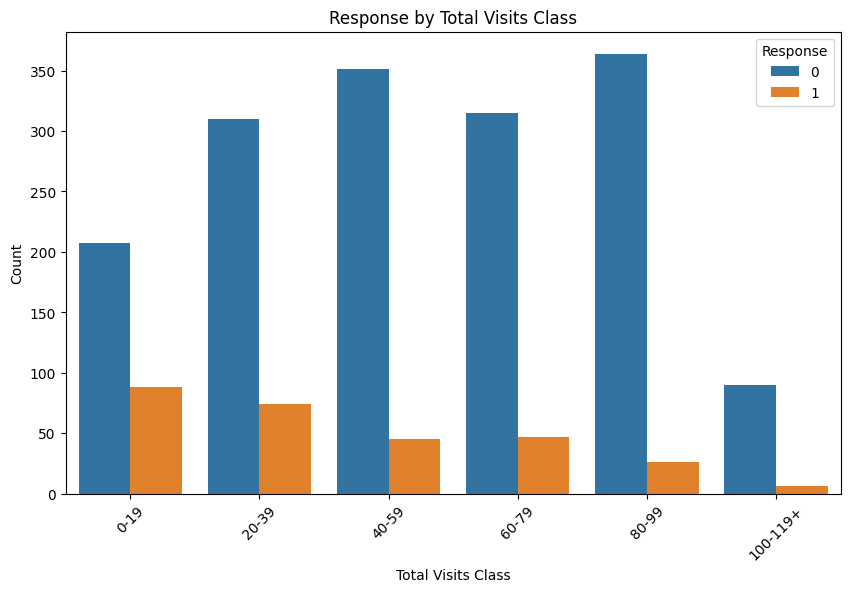

In [253]:
bins = list(range(0, 121, 20))  
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100-119+']
removed_dups['Total_Visits_Class'] = pd.cut(removed_dups['Total_Visits'], 
                                bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Visits_Class', hue='Response', data=removed_dups, 
                                order=labels)
plt.title('Response by Total Visits Class')
plt.xlabel('Total Visits Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.show()


In [254]:
## To further get a grasp on spending. Let us add average amount per purchase
def compute_average_purchase(df):
    df['Average_Purchase'] = (df['Total_Spent'] + df['Total_Purchases']) / 2
    return df
removed_dups = compute_average_purchase(removed_dups)
removed_dups

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_61032\1773536274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_Purchase'] = (df['Total_Spent'] + df['Total_Purchases']) / 2


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,372,18,126,...,True,Infrequent,Quinquagenarian,689,Light-Spender,20,20-24,103,100-119+,354.5
2236,5263,2n Cycle,Married,31056.0,1,0,99,5,10,13,...,False,Infrequent,Quinquagenarian,55,Cheap-Spender,5,5-9,107,100-119+,30.0
2237,22,Graduation,Divorced,46310.0,1,0,99,185,2,88,...,True,Infrequent,Quinquagenarian,309,Cheap-Spender,14,10-14,107,100-119+,161.5
2238,528,Graduation,Married,65819.0,0,0,99,267,38,701,...,False,Infrequent,Quinquagenarian,1383,Average-Spender,20,20-24,102,100-119+,701.5


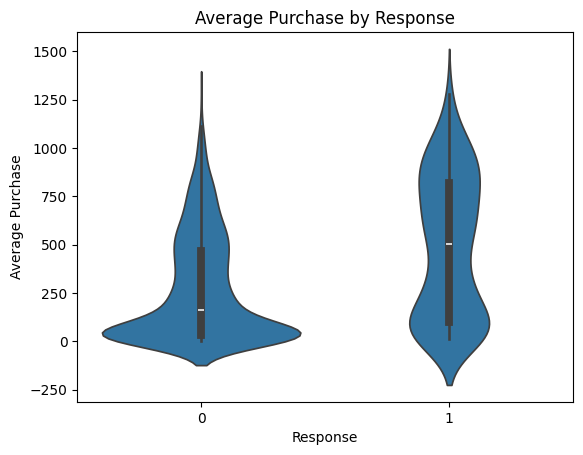

In [255]:
sns.violinplot(x='Response', y='Average_Purchase', data=removed_dups)
plt.xlabel('Response')
plt.ylabel('Average Purchase')
plt.title('Average Purchase by Response')
plt.show() # the higher the purchase, more likely to avail

### Since we have Profiled the Data to suit how we are going to use the features. Save the final dataframe to an excel file for Feature Engineering in the next Jupyter Notebook

In [256]:
removed_dups.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age',
       'Customer_Enrollment', 'Household', 'Children', 'Family_Classification',
       'Single_Parent', 'Recency_Class', 'Age_Class', 'Total_Spent',
       'Total_Spent_Class', 'Total_Purchases', 'Total_Purchases_Class',
       'Total_Visits', 'Total_Visits_Class', 'Average_Purchase'],
      dtype='object')

In [257]:
removed_dups.to_excel('feature_engineering.xlsx', index=False)